<a href="https://colab.research.google.com/github/brunorreiss/analise_video_games/blob/main/analise_video_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome:** Bruno Reis


1. Entender o problema (objetivo)

2. Entender os dados (usar a estatística para isso)

    - Descrever as colunas
    - Tem dado faltante?
    - Quantas colunas numéricas (quantitativas) e quantas categóricas (qualitativas)? Classifique
    - Calcular média, mediana, desvio padrão, quartis, percentis, assimetria, moda, correlação
    - Identificar os outliers
    - Criar gráficos para fazer a visualização dos dados

3. Limpar os dados (preparar os dados)

4. Escolher uma coluna para analisar a data (datetime)

5. Conclusão sobre os dados

**Documentação da Análise de Dados de Vendas de Videogames**

**Objetivo**
O objetivo desta análise é explorar um conjunto de dados de vendas de videogames para entender as tendências de vendas, os fatores que influenciam essas vendas e prever vendas futuras com base em características disponíveis como gênero, plataforma, ano de lançamento e pontuações de revisão.

**Metodologia**
A análise foi conduzida em várias etapas:

***Entendimento dos Dados:*** Inicialmente, realizamos uma exploração dos dados para entender suas características, incluindo a identificação de variáveis categóricas e numéricas e a verificação de dados faltantes.

***Análise Estatística Descritiva:*** Calculamos estatísticas descritivas para compreender melhor a distribuição das vendas e as características dos jogos.

***Análise Visual:*** Utilizamos gráficos para visualizar distribuições de vendas, tendências ao longo do tempo e relações entre variáveis.

***Preparação dos Dados:*** Tratamos valores faltantes e preparamos os dados para análises mais aprofundadas, incluindo a normalização de variáveis numéricas e codificação de variáveis categóricas quando necessário.

Modelagem Preditiva: Construímos um modelo de regressão linear para prever vendas globais com base no ano de lançamento e pontuações de revisão.

***Análise de Componentes Principais (PCA):*** Aplicamos PCA para reduzir a dimensionalidade dos dados e identificar os principais fatores que explicam a variância nas vendas.

**Resultados e Conclusões**
***Análise Descritiva e Visual:*** Revelou a existência de outliers significativos nas vendas, indicando a presença de jogos com sucesso extraordinário. Além disso, observamos variações nas vendas por gênero e plataforma ao longo do tempo.

***Modelagem Preditiva:*** O modelo de regressão linear, embora simples, forneceu uma base para a previsão de vendas, destacando a relação entre vendas, ano de lançamento e revisões.

***PCA:*** Identificou os principais componentes que explicam a variância nos dados, sugerindo que uma combinação do ano de lançamento e das pontuações de revisão são fatores significativos.

**Recomendações para Análises Futuras**
Explorar Modelos de Machine Learning mais Complexos: Modelos como florestas aleatórias ou redes neurais podem capturar melhor as relações não-lineares entre as variáveis.

***Análise de Séries Temporais:*** Profundizar na análise de tendências e padrões temporais nas vendas para prever flutuações futuras.

***Redes Neurais para Classificação:*** Usar redes neurais para classificar jogos como sucessos de vendas com base em características detalhadas, potencialmente fornecendo insights sobre os fatores mais influentes no sucesso de um jogo.

**Conclusão**
Este trabalho forneceu uma visão abrangente das vendas de videogames, identificando tendências, fatores de influência e potenciais áreas para análise preditiva. Recomenda-se explorar técnicas analíticas e preditivas mais avançadas para insights mais profundos e previsões mais precisas.

In [33]:
# Import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Carregar o conjunto de dados
dados = pd.read_csv('Video Games Sales.csv')

# Exibir as primeiras linhas do conjunto de dados para entender sua estrutura
dados.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [34]:
# Verificar dados faltantes
dados_faltantes = dados.isnull().sum()

# Classificação das colunas
colunas_numericas = dados.select_dtypes(include=['float64', 'int64']).columns.tolist()
colunas_categoricas = dados.select_dtypes(include=['object']).columns.tolist()

dados_faltantes, colunas_numericas, colunas_categoricas

(index             0
 Rank              0
 Game Title        0
 Platform          0
 Year             29
 Genre             0
 Publisher         2
 North America     0
 Europe            0
 Japan             0
 Rest of World     0
 Global            0
 Review            0
 dtype: int64,
 ['index',
  'Rank',
  'Year',
  'North America',
  'Europe',
  'Japan',
  'Rest of World',
  'Global',
  'Review'],
 ['Game Title', 'Platform', 'Genre', 'Publisher'])

In [35]:
# Calculando estatísticas descritivas para as colunas numéricas
estatisticas_descritivas = dados[colunas_numericas].describe()

# Calculando a assimetria para as colunas numéricas
assimetria = dados[colunas_numericas].skew()

# Calculando a correlação entre as colunas numéricas
correlacao = dados[colunas_numericas].corr()

estatisticas_descritivas, assimetria, correlacao

(           index       Rank         Year  North America       Europe  \
 count  1907.0000  1907.0000  1878.000000    1907.000000  1907.000000   
 mean    953.0000   954.0000  2003.766773       1.258789     0.706675   
 std     550.6478   550.6478     5.895369       1.956560     1.148904   
 min       0.0000     1.0000  1983.000000       0.000000     0.000000   
 25%     476.5000   477.5000  2000.000000       0.510000     0.230000   
 50%     953.0000   954.0000  2005.000000       0.810000     0.440000   
 75%    1429.5000  1430.5000  2008.000000       1.375000     0.810000   
 max    1906.0000  1907.0000  2012.000000      40.430000    28.390000   
 
              Japan  Rest of World       Global       Review  
 count  1907.000000    1907.000000  1907.000000  1907.000000  
 mean      0.317493       0.206471     2.489240    79.038977  
 std       0.724945       0.343093     3.563159    10.616899  
 min       0.000000       0.000000     0.830000    30.500000  
 25%       0.000000       

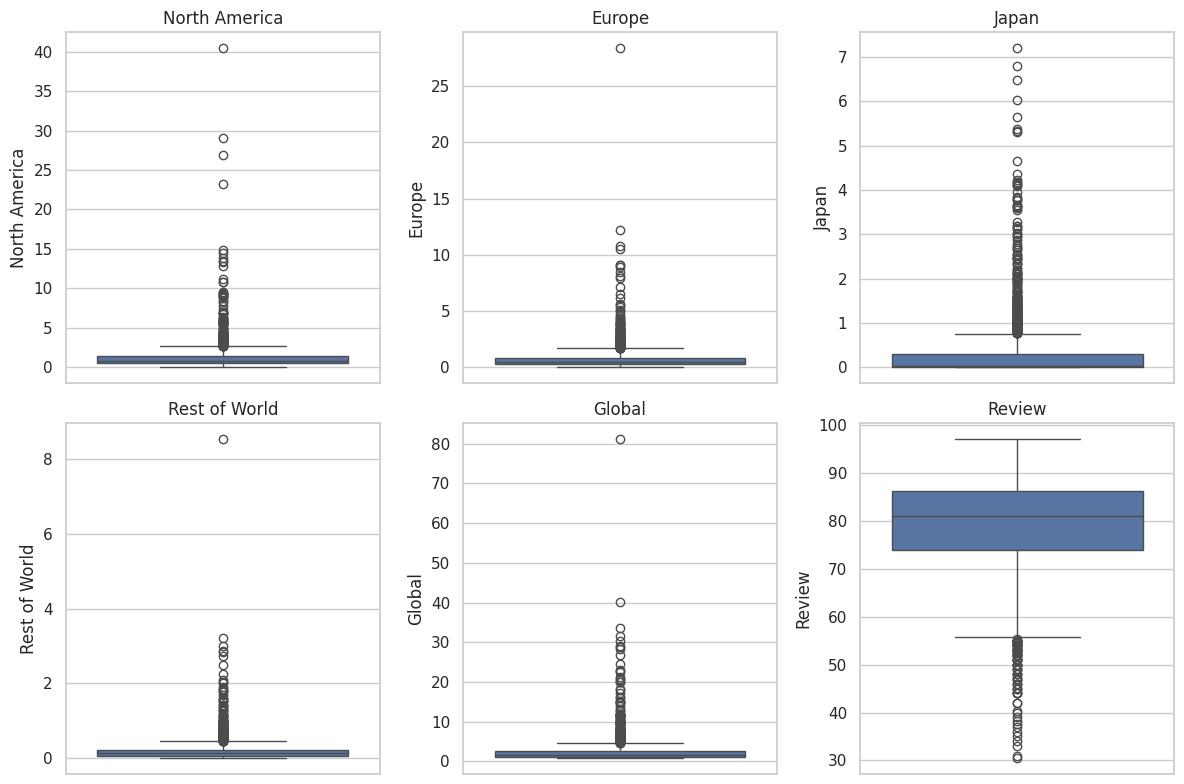

In [36]:
# Configurações de estilo dos gráficos
sns.set(style="whitegrid")

# Lista de colunas para os boxplots
colunas_vendas_review = ['North America', 'Europe', 'Japan', 'Rest of World', 'Global', 'Review']

# Criando boxplots para as colunas selecionadas
plt.figure(figsize=(12, 8))
for i, coluna in enumerate(colunas_vendas_review, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=dados[coluna])
    plt.title(coluna)

plt.tight_layout()
plt.show()

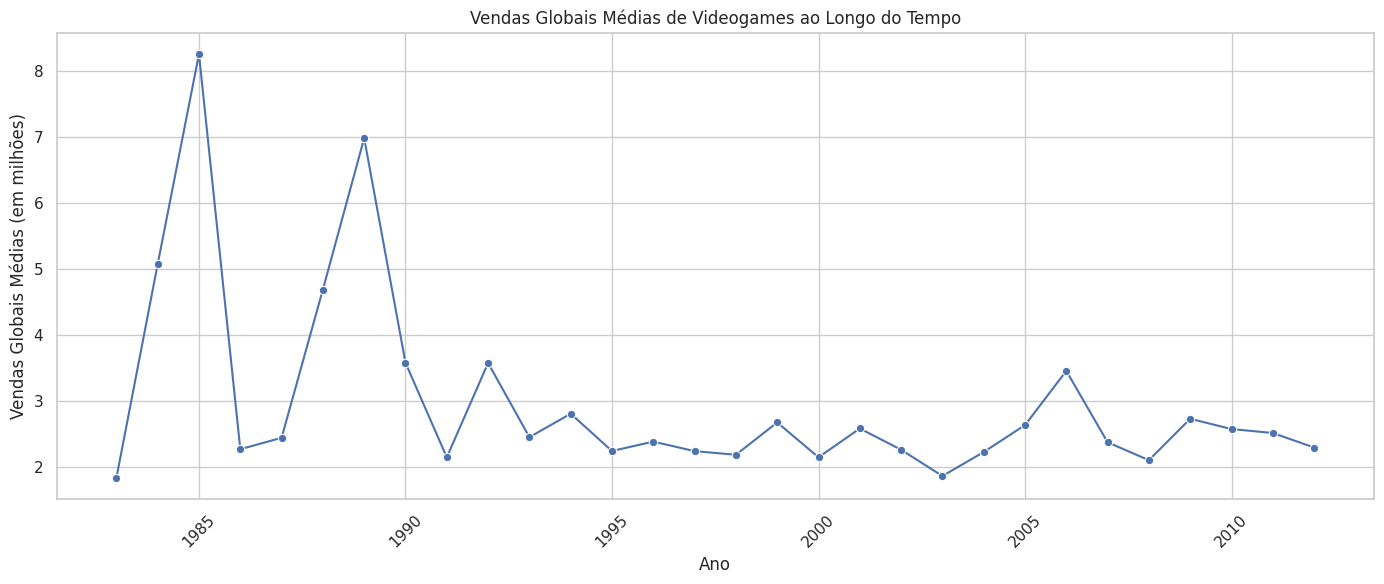

In [37]:
# Removendo dados com ano faltante para o gráfico de linhas
dados_tempo = dados.dropna(subset=['Year'])

# Agrupando dados por ano para as vendas globais médias
vendas_ano = dados_tempo.groupby('Year')['Global'].mean().reset_index()

# Vendas Globais ao Longo do Tempo
plt.figure(figsize=(14, 6))
sns.lineplot(data=vendas_ano, x='Year', y='Global', marker='o')
plt.title('Vendas Globais Médias de Videogames ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais Médias (em milhões)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

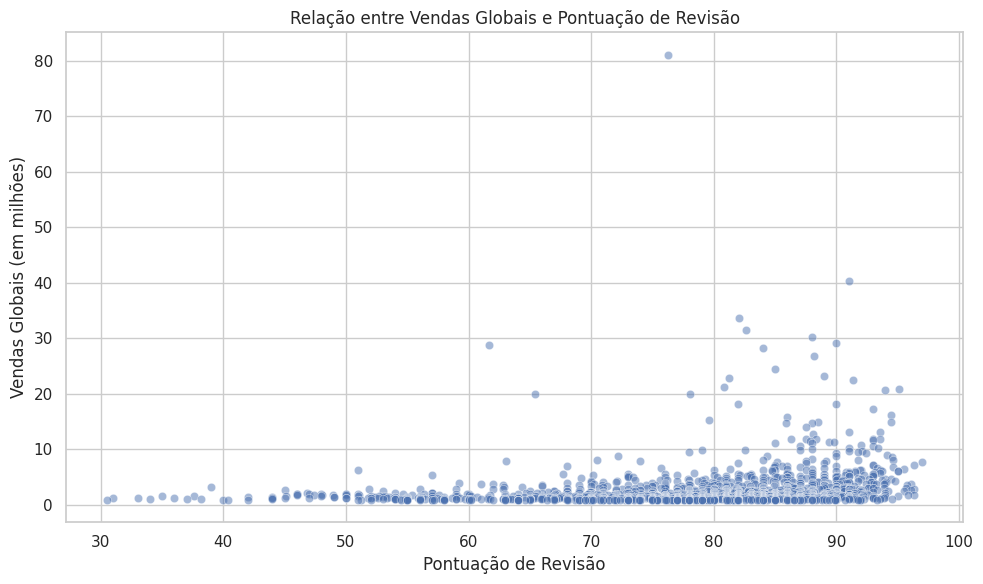

In [38]:
# Relação entre Vendas Globais e Revisões
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='Review', y='Global', alpha=0.5)
plt.title('Relação entre Vendas Globais e Pontuação de Revisão')
plt.xlabel('Pontuação de Revisão')
plt.ylabel('Vendas Globais (em milhões)')
plt.tight_layout()
plt.show()

In [39]:
# Cálculo do IQR para vendas globais
Q1 = dados['Global'].quantile(0.25)
Q3 = dados['Global'].quantile(0.75)
IQR = Q3 - Q1

# Definindo limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando outliers
outliers_vendas_globais = dados[(dados['Global'] < limite_inferior) | (dados['Global'] > limite_superior)]

# Resumo dos outliers identificados
outliers_resumo = outliers_vendas_globais[['Game Title', 'Genre', 'Platform', 'Year', 'Global']].sort_values(by='Global', ascending=False)

# Quantidade de outliers por gênero e plataforma
outliers_por_genero = outliers_vendas_globais['Genre'].value_counts()
outliers_por_plataforma = outliers_vendas_globais['Platform'].value_counts()

outliers_resumo.head(), outliers_por_genero, outliers_por_plataforma

(          Game Title     Genre Platform    Year  Global
 0         Wii Sports    Sports      Wii  2006.0   81.12
 1  Super Mario Bros.  Platform      NES  1985.0   40.24
 2     Mario Kart Wii    Racing      Wii  2008.0   33.55
 3  Wii Sports Resort    Sports      Wii  2009.0   31.52
 4             Tetris    Puzzle       GB  1989.0   30.26,
 Platform        30
 Shooter         28
 Role-Playing    26
 Action          24
 Racing          18
 Misc            15
 Sports          13
 Adventure        8
 Fighting         6
 Simulation       5
 Puzzle           4
 Strategy         2
 Name: Genre, dtype: int64,
 X360    23
 Wii     22
 PS2     21
 PS3     21
 DS      20
 PS      17
 GB      11
 N64      8
 GBA      7
 NES      7
 SNES     6
 PC       4
 3DS      3
 PSP      3
 GC       3
 XB       2
 GEN      1
 Name: Platform, dtype: int64)

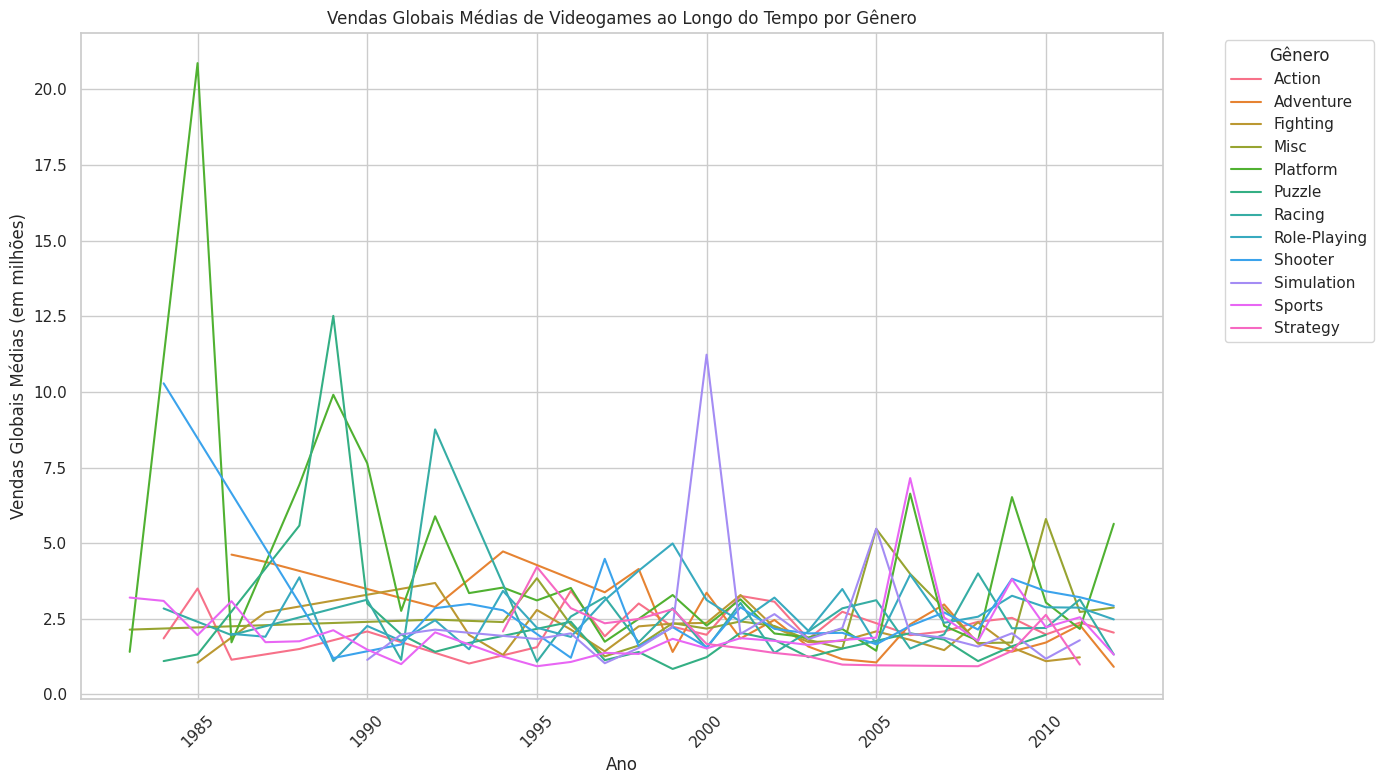

In [40]:
# Agrupando dados por ano e gênero para calcular as vendas globais médias
vendas_ano_genero = dados.groupby(['Year', 'Genre'])['Global'].mean().unstack()

# Plotando as vendas globais médias ao longo do tempo por gênero
plt.figure(figsize=(14, 8))
sns.lineplot(data=vendas_ano_genero, dashes=False)
plt.title('Vendas Globais Médias de Videogames ao Longo do Tempo por Gênero')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais Médias (em milhões)')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

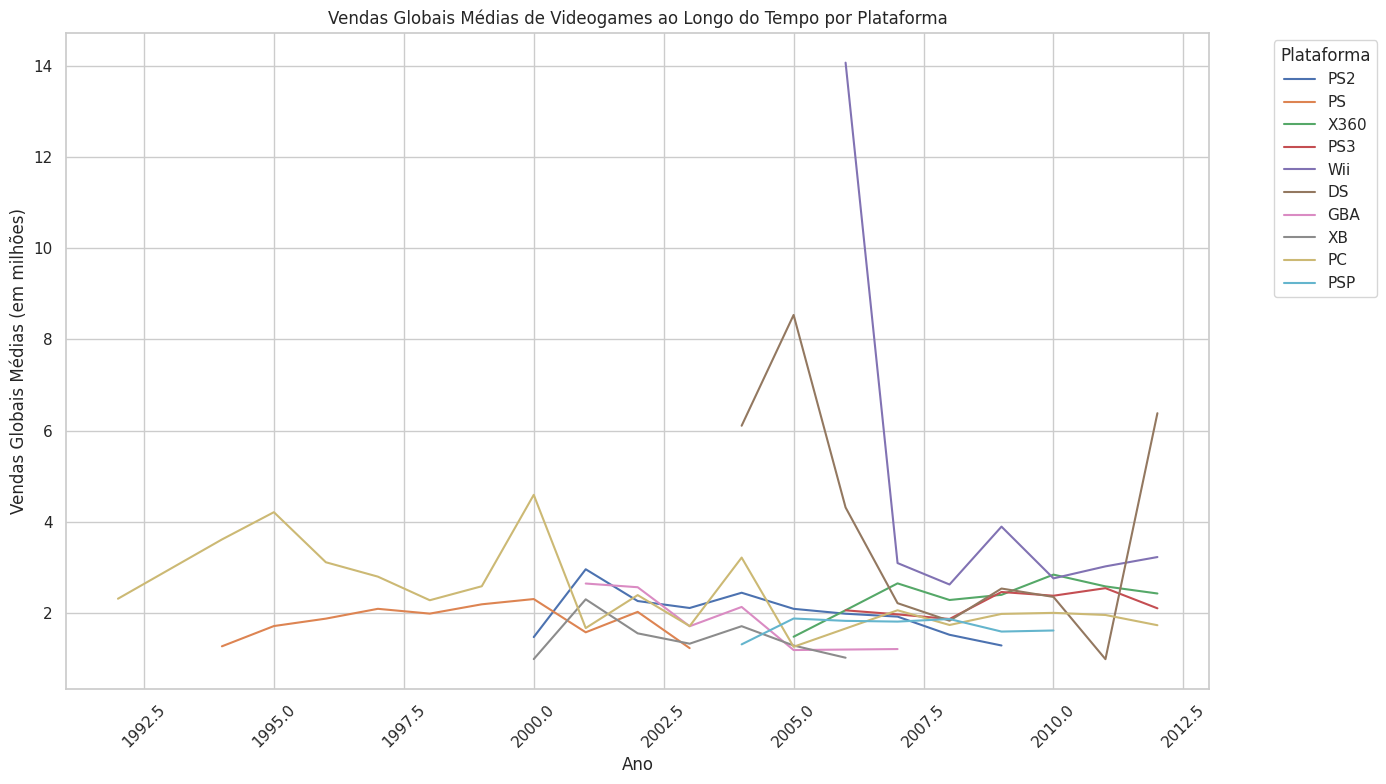

In [41]:
# Agrupando dados por ano e plataforma para calcular as vendas globais médias
vendas_ano_plataforma = dados.groupby(['Year', 'Platform'])['Global'].mean().unstack()

# Limitando a quantidade de plataformas para melhor visualização, focando nas 10 com mais jogos
top_plataformas = dados['Platform'].value_counts().head(10).index
vendas_ano_plataforma_top = vendas_ano_plataforma[top_plataformas]

# Plotando as vendas globais médias ao longo do tempo por plataforma
plt.figure(figsize=(14, 8))
sns.lineplot(data=vendas_ano_plataforma_top, dashes=False)
plt.title('Vendas Globais Médias de Videogames ao Longo do Tempo por Plataforma')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais Médias (em milhões)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

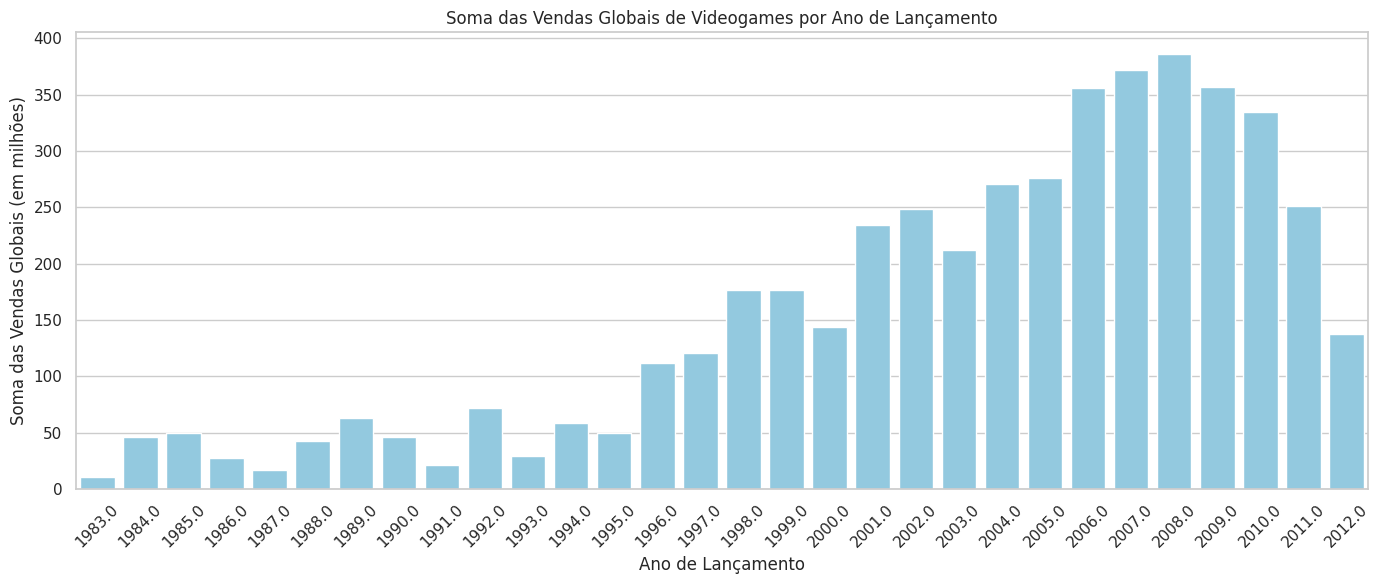

In [42]:
# Agrupando dados por ano para calcular a soma das vendas globais
vendas_soma_ano = dados.groupby('Year')['Global'].sum().reset_index()

# Plotando a soma das vendas globais ao longo do tempo
plt.figure(figsize=(14, 6))
sns.barplot(data=vendas_soma_ano, x='Year', y='Global', color='skyblue')
plt.title('Soma das Vendas Globais de Videogames por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Soma das Vendas Globais (em milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

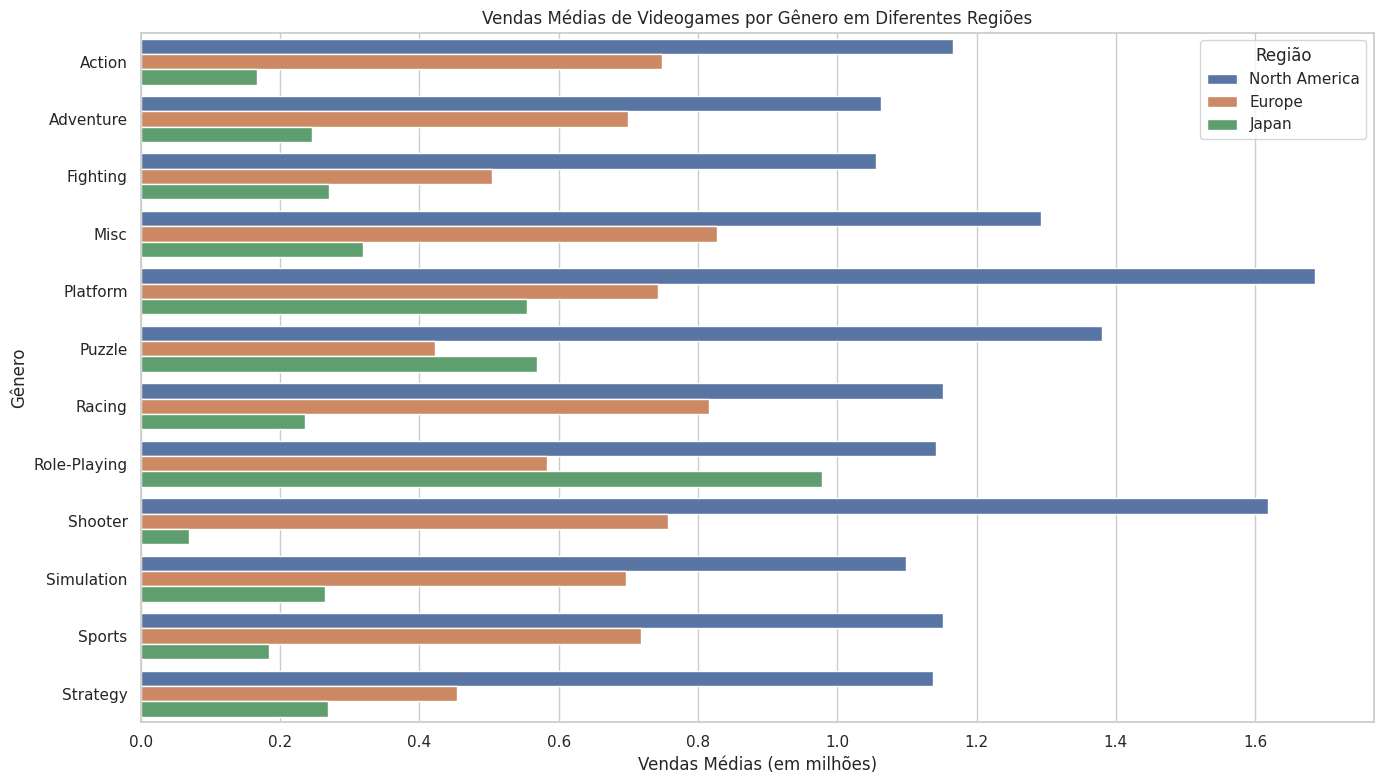

In [43]:
# Calculando as vendas médias por gênero em cada região principal
vendas_media_genero_regiao = dados.groupby('Genre').agg({
    'North America': 'mean',
    'Europe': 'mean',
    'Japan': 'mean'
}).reset_index()

# Reordenando para facilitar a visualização
vendas_media_genero_regiao = vendas_media_genero_regiao.melt(id_vars=["Genre"], var_name="Região", value_name="Vendas Médias")

# Plotando as vendas médias por gênero em cada região
plt.figure(figsize=(14, 8))
sns.barplot(x='Vendas Médias', y='Genre', hue='Região', data=vendas_media_genero_regiao)
plt.title('Vendas Médias de Videogames por Gênero em Diferentes Regiões')
plt.xlabel('Vendas Médias (em milhões)')
plt.ylabel('Gênero')
plt.legend(title='Região')
plt.tight_layout()
plt.show()

In [48]:
# Calculando a correlação de Spearman
"""
Mede correlação de ranque entre variáveis, útil para relações não lineares.
"""
correlacao_spearman = dados[['Global', 'Year', 'Review']].corr(method='spearman')

correlacao_spearman

,Global,Year,Review
Global,1.000000,-0.085743,0.330821
Year,-0.085743,1.000000,-0.002918
Review,0.330821,-0.002918,1.000000
